# Javier Palomares Homework 1 b

## Correlations

* When given a data matrix, an easy way to tell if any two columns are correlated is to look at a scatter plot of each column against each other column. For a warm up, do this: Look at the data in DF1 in HW1b Data.zip.

In [1]:
df1FilePath="./DF1"
df2FilePath="./DF2"

import pandas as pd
df1 = pd.read_csv(df1FilePath,header=None)
df2 = pd.read_csv(df2FilePath,header=None)
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 5 columns):
0    10000 non-null float64
1    10001 non-null float64
2    10001 non-null float64
3    10001 non-null float64
4    10001 non-null float64
dtypes: float64(5)
memory usage: 390.7 KB


,0,1,2,3,4
count,10000.00000,10001.000000,10001.000000,10001.000000,10001.000000
mean,4999.50000,0.007703,0.009413,0.007785,-0.008154
std,2886.89568,1.000729,1.002684,1.000942,1.002982
min,0.00000,-3.471566,-4.056024,-3.524182,-3.930215
25%,2499.75000,-0.663403,-0.663677,-0.666270,-0.697813
50%,4999.50000,0.017647,0.009134,0.012511,-0.007868
75%,7499.25000,0.667543,0.696164,0.672962,0.668751
max,9999.00000,3.854101,3.908736,3.608846,3.985592


 Which columns are (pairwise) correlated? Figure out how to do this with Pandas, and also how to do this with Seaborn. 

In [10]:
corr1 = df1.corr()
print(corr1)

          0         1         2         3         4
0  1.000000 -0.003991  0.008789 -0.004044 -0.007086
1 -0.003991  1.000000 -0.003998  0.989869  0.004107
2  0.008789 -0.003998  1.000000 -0.003887 -0.989445
3 -0.004044  0.989869 -0.003887  1.000000  0.004662
4 -0.007086  0.004107 -0.989445  0.004662  1.000000


Using pandas, we see that columns at position 1 and position 3 are correlated, and columns at position 2 and 4 are negatively correlated

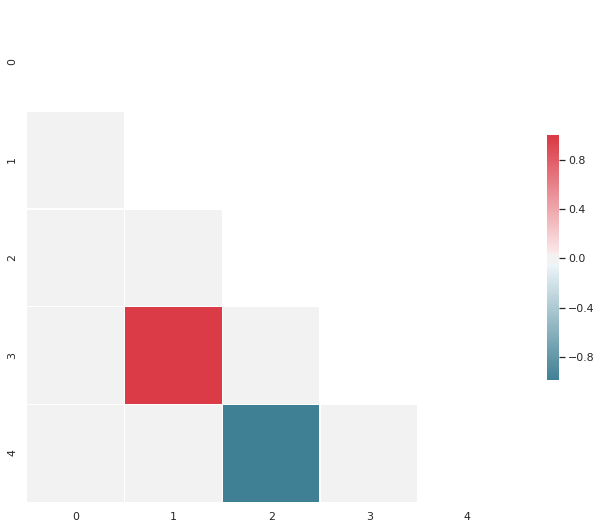

In [18]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style='white')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colorma# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr1, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Using seaborn, I can see the correlation between columns 1 and 3, and the negative correlation between columns 2 and 4

* Compute the covariance matrix of the data. Write the explicit expression for what this
is, and then use any command you like (e.g., np.cov) to compute the 4 × 4 matrix.
Explain why the numbers that you get fit with the plots you got.

In [25]:
cov1 = np.cov(df1)
print(pd.DataFrame(cov1))

       0           1            2            3            4            5      \
0        NaN         NaN          NaN          NaN          NaN          NaN   
1        NaN    0.720015    -0.222806     0.865023    -0.580615    -1.327349   
2        NaN   -0.222806     0.348118    -0.177126     0.711752     1.104390   
3        NaN    0.865023    -0.177126     3.078561     0.475195     0.228885   
4        NaN   -0.580615     0.711752     0.475195     1.981418     3.188303   
5        NaN   -1.327349     1.104390     0.228885     3.188303     5.441970   
6        NaN   -0.267937     0.947068     1.942090     2.850466     4.218849   
7        NaN   -1.200474     1.428707     1.126912     4.091099     6.610589   
8        NaN   -0.265872     1.175324     3.297507     3.924036     5.801581   
9        NaN   -0.797597     1.672477     2.097213     4.646383     7.073622   
10       NaN   -1.130870     1.979131     2.206985     5.526521     8.547712   
11       NaN   -0.614156     1.637552   